# W09 Vietnam Memorial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get Casuality Data

https://repository.duke.edu/catalog/29367025-709c-4c31-93fb-d022a2a09a3b

In [24]:
df = pd.read_csv("CACCF.csv", low_memory=False)

# Remove columns with nulls
df = df.T.dropna().T

# Handle dates
df['died_date'] = pd.to_datetime(df['DIED'], format='%m/%d/%y')
df['died_year'] = df.DIED.str.split("/").str[-1].astype(int)
df['died_month'] = df.DIED.str.split("/").str[0].astype(int)
df['died_day'] = df.DIED.str.split("/").str[1].astype(int)

# Include only active war years
df = df.query("died_year < 76 and died_year > 54").copy()

In [25]:
G = df.groupby(['died_year','died_month'])

In [26]:
DIED = G.DIED.count().unstack(fill_value=0)

In [27]:
DIED.head()

died_month,1,2,3,4,5,6,7,8,9,10,11,12
died_year,,,,,,,,,,,,
56,0,0,0,0,0,1,0,0,0,0,0,0
57,0,0,0,0,0,0,0,0,0,1,0,0
59,0,0,0,0,0,0,2,0,0,0,0,0
60,0,4,0,0,0,0,0,1,0,0,0,0
61,1,0,7,3,0,1,1,2,0,0,0,1


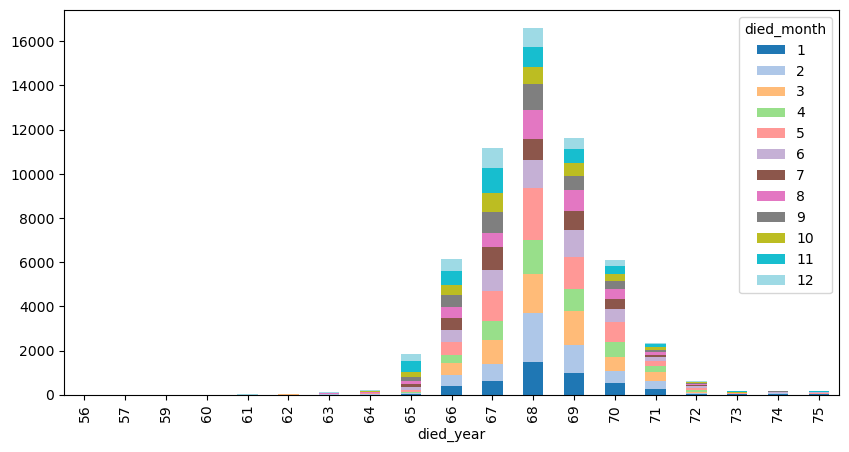

In [28]:
DIED.plot.bar(rot=90, figsize=(10, 5), stacked=True, cmap=plt.get_cmap('tab20'))
plt.show()

In [29]:
DIED.iloc[:(75-56),:].style.background_gradient(axis=None, cmap='Reds')

died_month,1,2,3,4,5,6,7,8,9,10,11,12
died_year,,,,,,,,,,,,
56,0,0,0,0,0,1,0,0,0,0,0,0
57,0,0,0,0,0,0,0,0,0,1,0,0
59,0,0,0,0,0,0,2,0,0,0,0,0
60,0,4,0,0,0,0,0,1,0,0,0,0
61,1,0,7,3,0,1,1,2,0,0,0,1
62,3,12,1,6,3,3,6,1,0,11,4,2
63,14,8,6,6,8,5,8,10,2,23,5,23
64,14,11,16,12,15,14,17,17,14,28,18,30
65,18,53,22,54,82,143,96,177,145,221,541,311


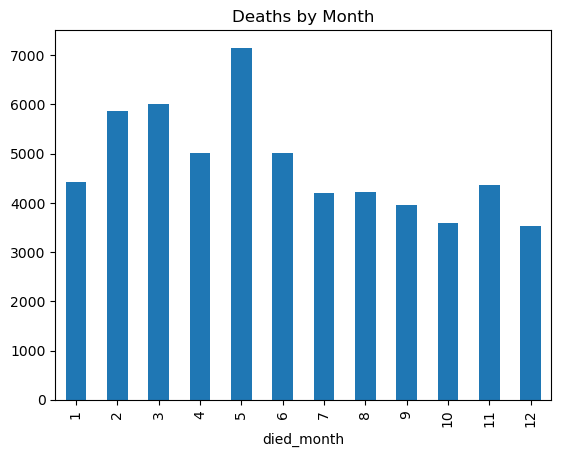

In [30]:
DIED.sum().plot.bar()
plt.title("Deaths by Month")
plt.show()

In [31]:
DIED2 = DIED.stack().to_frame('n')
DIED2['date'] = DIED2.apply(lambda x: f"{str(x.name[1]).zfill(2)}/{x.name[0]}", axis=1)
DIED2 = DIED2.reset_index().set_index('date')

In [32]:
DIED2

,died_year,died_month,n
date,,,
01/56,56,1,0
02/56,56,2,0
03/56,56,3,0
04/56,56,4,0
05/56,56,5,0
...,...,...,...
08/75,75,8,5
09/75,75,9,9
10/75,75,10,4


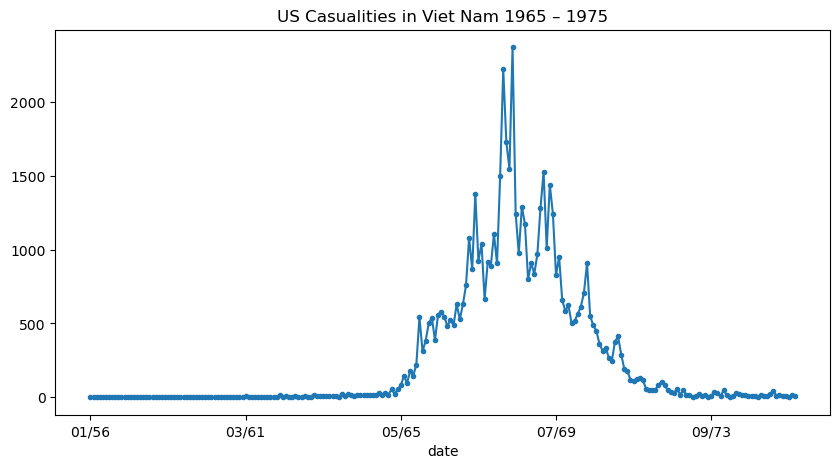

In [33]:
DIED2.n.plot(legend=False, style=".-", figsize=(10,5))
plt.title("US Casualities in Viet Nam 1965 – 1975")
plt.show()

In [34]:
max_idx = DIED2.n.idxmax()
max_idx_row_number = DIED2.index.get_loc(max_idx)

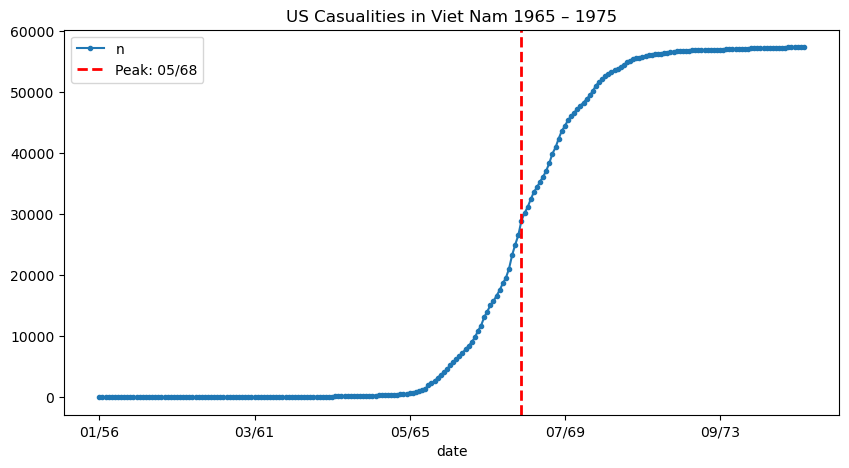

In [35]:
DIED2.n.cumsum().plot.line(x = 'date', y = 'n', style=".-", figsize=(10,5))
plt.title("US Casualities in Viet Nam 1965 – 1975")
plt.axvline(max_idx_row_number, ls='--', c='red', lw=2, label=f'Peak: {max_idx}')
plt.legend()
plt.show()

# Names List

In [36]:
month_names = "JAN FEB MAR APR MAY JUN JUL AUG SEP OCT NOV DEC".split()

In [37]:
NAMES = (
    df[df.died_year == 68]
        .groupby(['died_month','died_day'])
        .apply(lambda x: "\n".join(x.NAME), include_groups=False)
        .to_frame('names')
        .reset_index()
)

In [38]:
NAMES.head()

,died_month,died_day,names
0,1,1,ANDERSON NORMAN RALPH\nVELAZQUEZ FRANK\nTINGLE...
1,1,2,BALLARD RONNIE EDSEL\nBERNARDY THOMAS G\nBOWMA...
2,1,3,BARTHOLOMEW HARRY ROBERT\nCLAIR JAMES THOMAS\n...
3,1,4,BABIN THOMAS DALTON JR\nFARRELL KENNETH JAMES\...
4,1,5,BAKER MICHAEL RAY\nWRENN FRED MELVIN\nSMOOT RO...


In [39]:
NAMES.names = NAMES.names.str.replace(" ", "&nbsp;")

In [40]:
ROWS = NAMES.apply(lambda x: f"<td><b>{month_names[x.died_month - 1]} {x.died_day}</b><br /><hr />" + x.names.replace("\n", "<br />") + "</td>", axis=1)

In [41]:
ROWS.head()

0    <td><b>JAN 1</b><br /><hr />ANDERSON&nbsp;NORM...
1    <td><b>JAN 2</b><br /><hr />BALLARD&nbsp;RONNI...
2    <td><b>JAN 3</b><br /><hr />BARTHOLOMEW&nbsp;H...
3    <td><b>JAN 4</b><br /><hr />BABIN&nbsp;THOMAS&...
4    <td><b>JAN 5</b><br /><hr />BAKER&nbsp;MICHAEL...
dtype: object

In [42]:
TABLE = "\n".join(ROWS.values.tolist())

In [43]:
HTML = f"""
<html>
    <head>
        <title>Deaths by Month and Day</title>
        <style type="text/css">
body {{
    color: white;
    background-color: black;
}}
td {{
    vertical-align: top;
    font-size: 8px;
    width: 30px;
}}
        </style>
    </head>
    <body>
        <h1>1968</h1>
        <table>
            <tr>
            {TABLE}
            </tr>
        </table>
    </body>
</html>
"""

In [44]:
with open('./vn-table.html', 'w') as outfile:
    outfile.write(HTML)

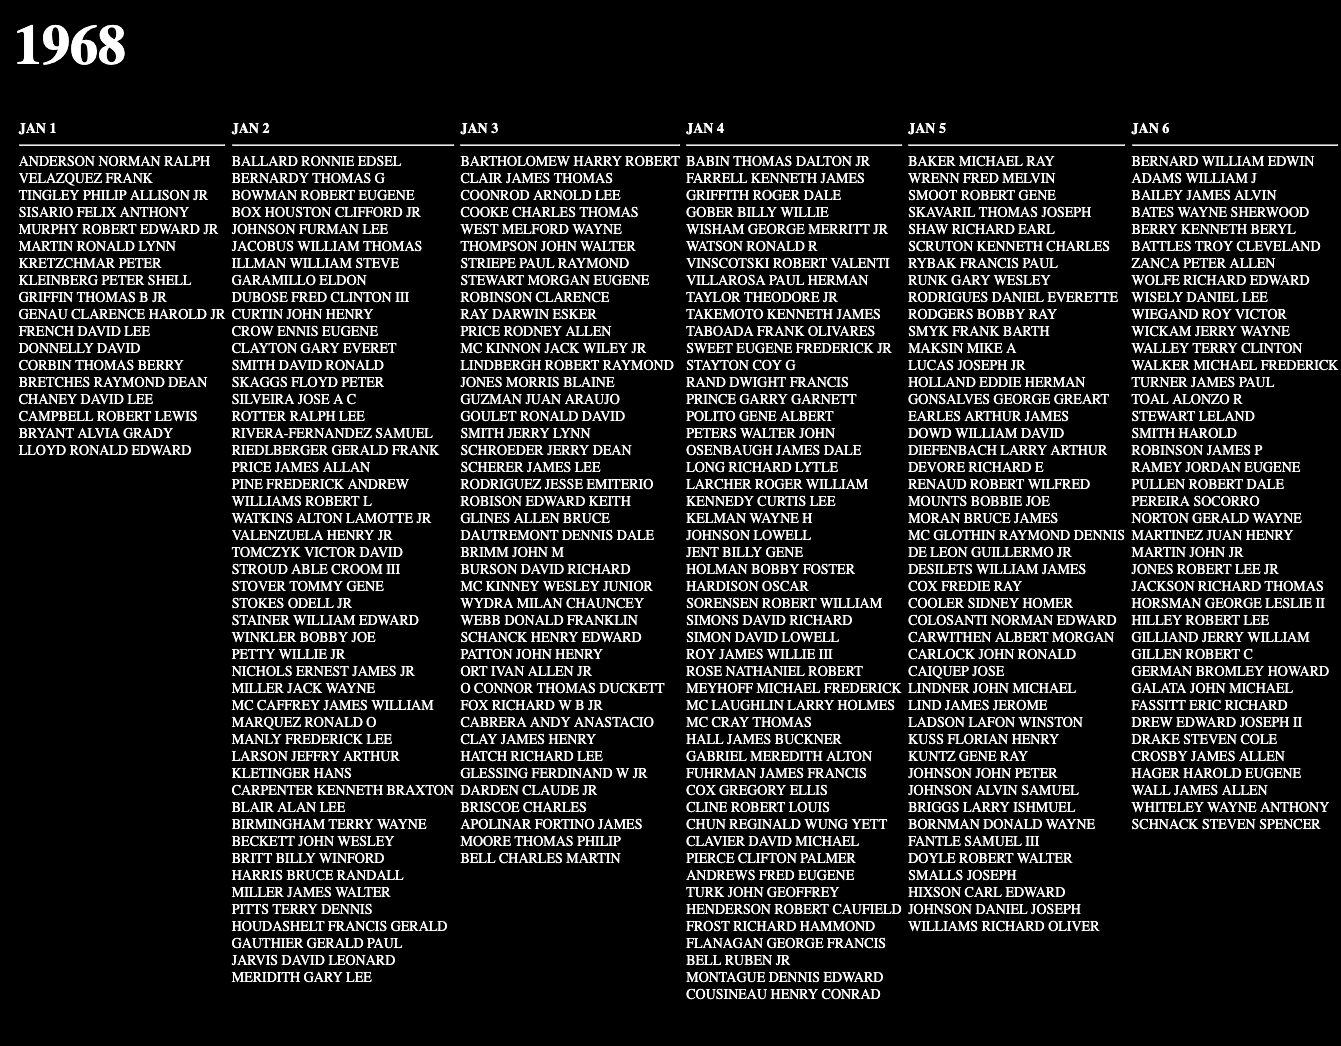